# Material:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
2. https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
3. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
import pandas as pd 

uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
mapa = {"unfinished": "Não finalizados",
        "price": "Preço",
        "expected_hours": "Horas esperadas"}

dados = dados.rename(columns = mapa)
dados.head()

,Não finalizados,Horas esperadas,Preço
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
troca = {0 : 1, 
         1 : 0}

dados["Finalizados"] = dados["Não finalizados"].map(troca)
dados.tail()

,Não finalizados,Horas esperadas,Preço,Finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='Horas esperadas', ylabel='Preço'>

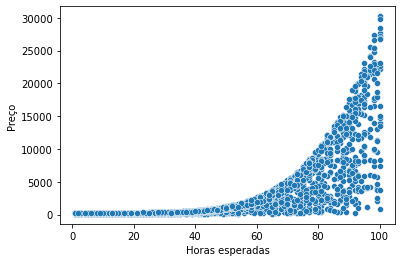

In [4]:
import seaborn as sns

sns.scatterplot(x="Horas esperadas", y="Preço", data=dados)

<AxesSubplot:xlabel='Horas esperadas', ylabel='Preço'>

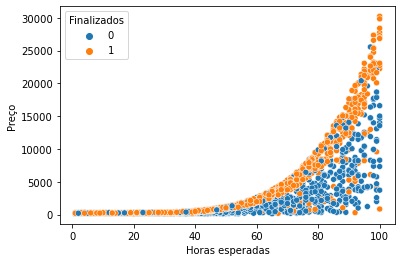

In [5]:

sns.scatterplot(x="Horas esperadas", y="Preço", hue="Finalizados", data=dados)

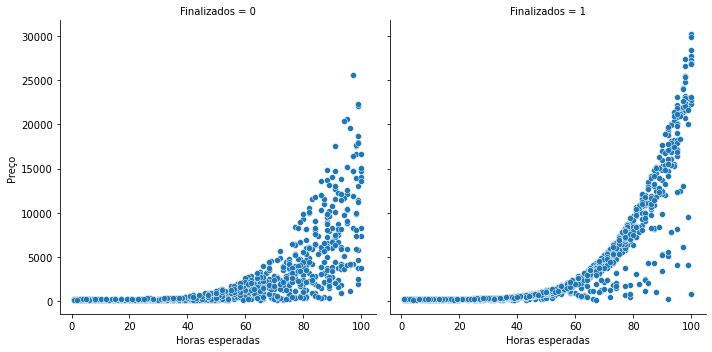

In [6]:
sns.relplot(x = "Horas esperadas",
                y = "Preço",
                col = "Finalizados",
                data = dados)

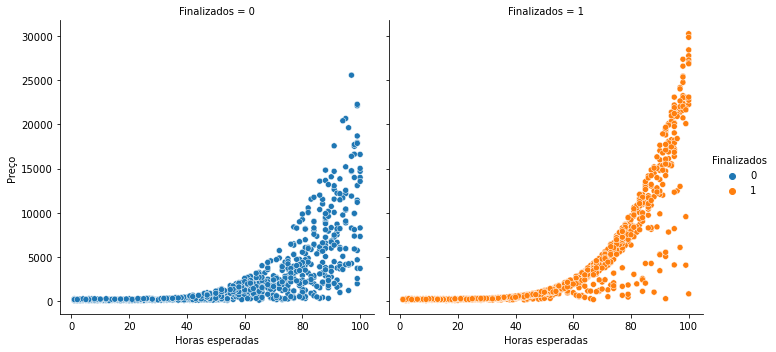

In [7]:
sns.relplot(x = "Horas esperadas",
                y = "Preço",
                col = "Finalizados",
                hue = "Finalizados",
                data = dados)

In [8]:
x = dados[["Horas esperadas", "Preço"]]
y = dados["Finalizados"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED, 
                                                        test_size = 0.20,                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {acuracia:.2%}")

Treinaremos com 1725 elementos e testaremos com 432 elementos.
A acurácia foi de 47.45%


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
import numpy as np

baseline = np.ones(len(teste_x))
acuracia_1 = accuracy_score(teste_y, baseline)
print(f"Acurácia foi de {acuracia_1:.2%}")

Acurácia foi de 52.55%


In [11]:
valor = (acuracia - acuracia_1)/acuracia
print(f"Aumento de {valor:.2%}")

Aumento de -10.73%


In [12]:
x_min = teste_x["Horas esperadas"].min()
x_max = teste_x["Horas esperadas"].max()

y_min = teste_x["Preço"].min()
y_max = teste_x["Preço"].max()

print(f"Valor min em X: {x_min}")
print(f"Valor max em X: {x_max}")
print(f"Valor min em Y: {y_min}")
print(f"Valor max em Y: {y_max}")

Valor min em X: 1
Valor max em X: 100
Valor min em Y: 101
Valor max em Y: 27343


In [13]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [14]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [15]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

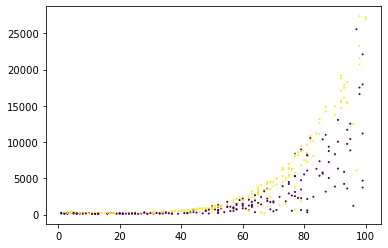

In [16]:
import matplotlib.pyplot as plt

plt.scatter(teste_x["Horas esperadas"],
            teste_x["Preço"],
            c = teste_y,
            s = 1)
# c = color
# s = size

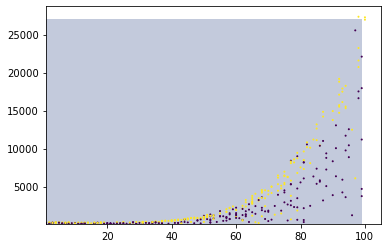

In [17]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x["Horas esperadas"],
            teste_x["Preço"],
            c = teste_y,
            s = 1)

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi de 55.56%


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


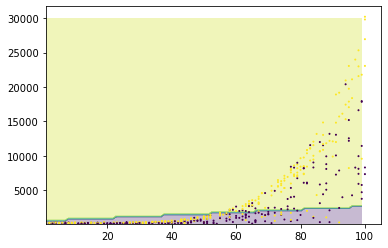

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED, 
                                                        test_size = 0.25,                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"A acurácia foi de {acuracia:.2%}")

x_min = teste_x["Horas esperadas"].min()
x_max = teste_x["Horas esperadas"].max()

y_min = teste_x["Preço"].min()
y_max = teste_x["Preço"].max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x["Horas esperadas"],
            teste_x["Preço"],
            c = teste_y,
            s = 1)

# Parte 4

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

SEED = 4

np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.2,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"Taxa de acerto: {acuracia:.2%}")

Treinaremos com 1725 elementos e testaremos com 432 elementos.
Taxa de acerto: 62.27%


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


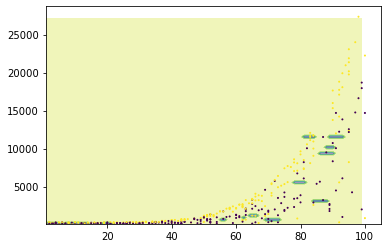

In [20]:
import matplotlib.pyplot as plt

x_min = teste_x["Horas esperadas"].min()
x_max = teste_x["Horas esperadas"].max()

y_min = teste_x["Preço"].min()
y_max = teste_x["Preço"].max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x["Horas esperadas"],
            teste_x["Preço"],
            c = teste_y,
            s = 1)

# Buscando o melhor SEED

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#SEED = 5

for SEED in range(100):
    np.random.seed(SEED)
    raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                            test_size = 0.2,
                                                            stratify = y)
    
    scaler = StandardScaler()
    scaler.fit(raw_treino_x)
    treino_x = scaler.transform(raw_treino_x)
    teste_x = scaler.transform(raw_teste_x)

    print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

    modelo = SVC(gamma='auto')
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)

    acuracia = accuracy_score(teste_y, previsoes)
    print(f"Para SEED = {SEED} a taxa de acerto foi de {acuracia:.2%}.")
    
    if SEED == 0:
        maior = acuracia
        posicao = SEED
    else:
        if acuracia > maior:
            maior = acuracia
            posicao = SEED

In [39]:
print(maior, posicao)

0.7222222222222222 58


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

SEED = 58

np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.2,
                                                        stratify = y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"Taxa de acerto foi de {acuracia:.2%}.")

Treinaremos com 1725 elementos e testaremos com 432 elementos.
Taxa de acerto foi de 72.22%.


In [43]:
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

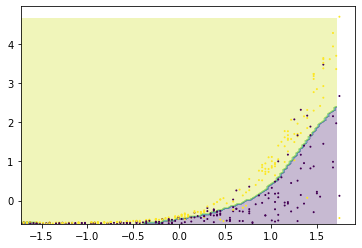

In [44]:
import matplotlib.pyplot as plt

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x,
            data_y,
            c = teste_y,
            s = 1)

In [45]:
valor = (acuracia - acuracia_1)/acuracia
print(f"Aumento de {valor:.2%}")

Aumento de 27.24%
